In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

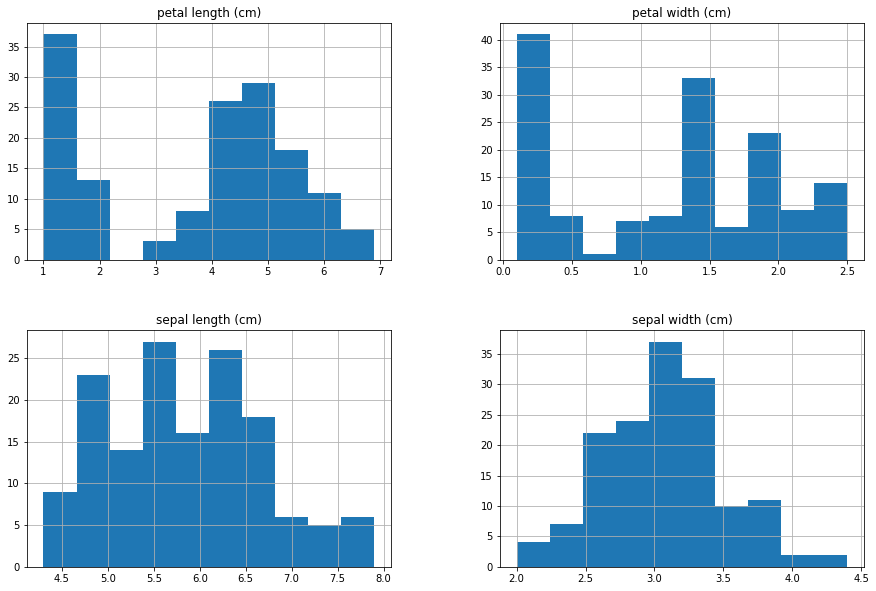

In [0]:

iris = datasets.load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

df.hist(figsize=(15,10));

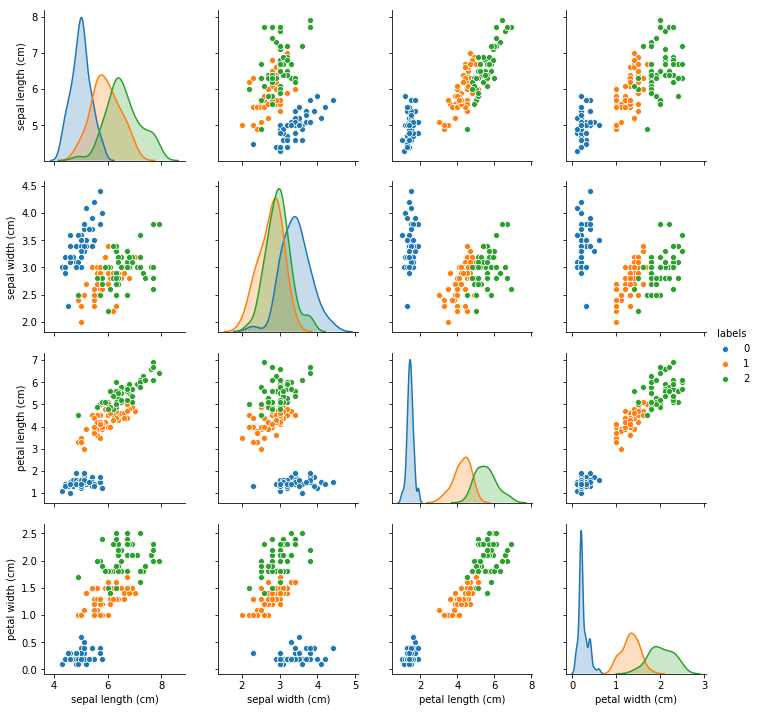

In [0]:

df['labels'] = iris['target']
sns.pairplot(df, hue='labels', vars=df.drop(columns='labels'))

In [0]:
from sklearn.cluster import KMeans


X = df.drop(columns='labels')

intra_cluster = []
for k in range(2, 4)

  model = KMeans(n_clusters=k)
  model = model.fit(X)
  intra_cluster.append(model.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2,4), intra_cluster)

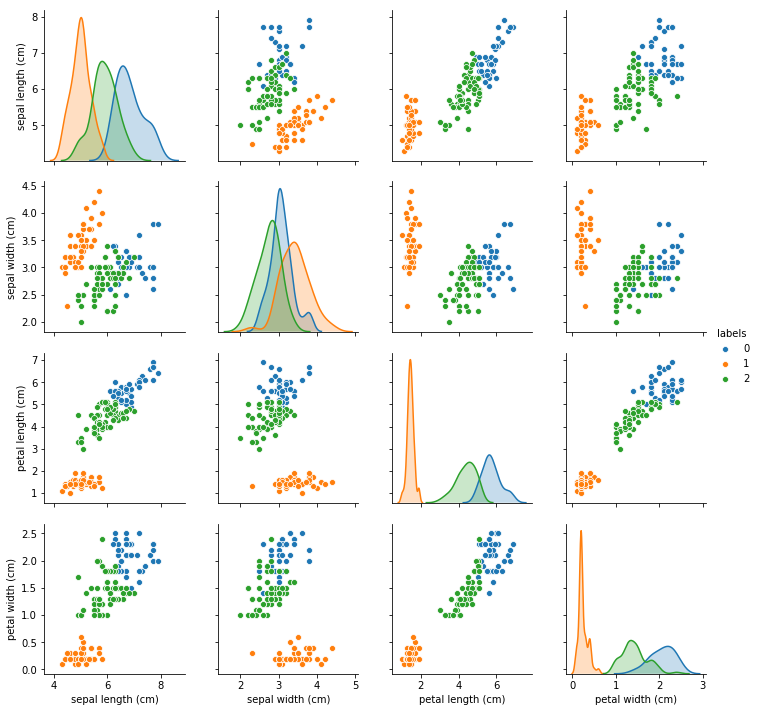

In [0]:
X['labels'] = model.labels_
sns.pairplot(X, hue='labels', vars=X.drop(columns='labels'))

In [0]:
X[X['labels'] == 0].describe()

In [0]:
https://archive.ics.uci.edu/ml/datasets/wine

## Primeira Prática

- Fazer o download do dataset wine através do sklearn (datasets.load_wine())
- Fazer uma análise inicial dos dados
- Executar o Kmeans variando o k de 2 a 10
- Selecionar o número ótimo de clusters a partir da análise do cotovelo

## Entrega
- Realizar a prática em um notebook separado
- Fazer o download do notebook ao final da prática (.ipynb)
- Enviar o notebook para os emails phar@poli.br rodrigo.paula@ufpe.br

In [0]:
from sklearn.metrics import silhouette_score

# Uso da métrica: silhouette_score(dados, labels)

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = datasets.load_wine()['data']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X)

X.head()
 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


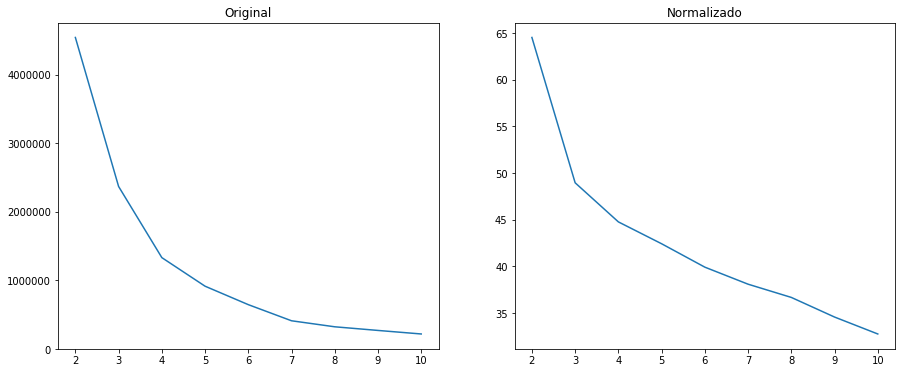

In [0]:
   # tecnica de K-Means com normalização sem metrica
  from sklearn.cluster import KMeans

  X = pd.DataFrame(datasets.load_wine()['data'])
  scaler = MinMaxScaler()
  X_norm = scaler.fit_transform(X)

  k_range = range(2, 11)
  ssw = []
  ssw_norm = []

  for k in k_range:

    model = KMeans(n_clusters=k)
    model = model.fit(X)
    ssw.append(model.inertia_)

    model = KMeans(n_clusters=k)
    model = model.fit(X_norm)
    ssw_norm.append(model.inertia_)

  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6) )

  ax1.plot(k_range, ssw)
  ax1.set_title('Original')

  ax2.plot(k_range, ssw_norm)
  ax2.set_title('Normalizado');

(0, 1)

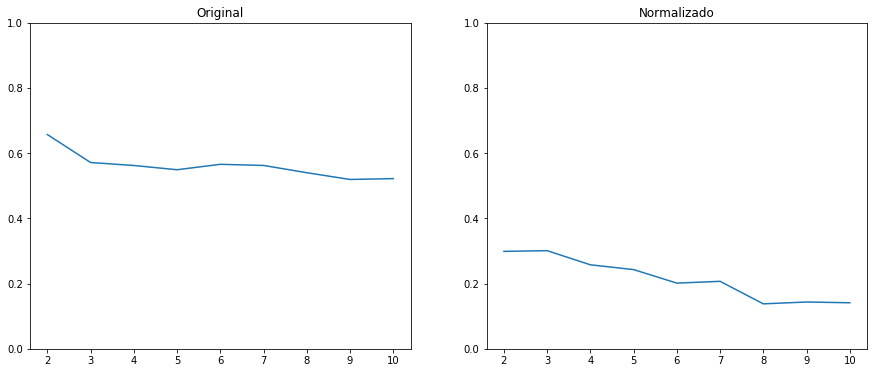

In [0]:
# tecnica de K-Means com normalização com metrica silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pd.DataFrame(datasets.load_wine()['data'])
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

k_range = range(2, 11)
sil = []
sil_norm = []
for k in k_range:
  
  model = KMeans(n_clusters=k)
  model = model.fit(X)
  sil.append(silhouette_score(X, model.labels_))
  
  model = KMeans(n_clusters=k)
  model = model.fit(X_norm)
  sil_norm.append(silhouette_score(X_norm, model.labels_))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(k_range, sil)
ax1.set_title('Original')
ax1.set_ylim(0,1)
ax2.plot(k_range, sil_norm)
ax2.set_title('Normalizado');
ax2.set_ylim(0,1)

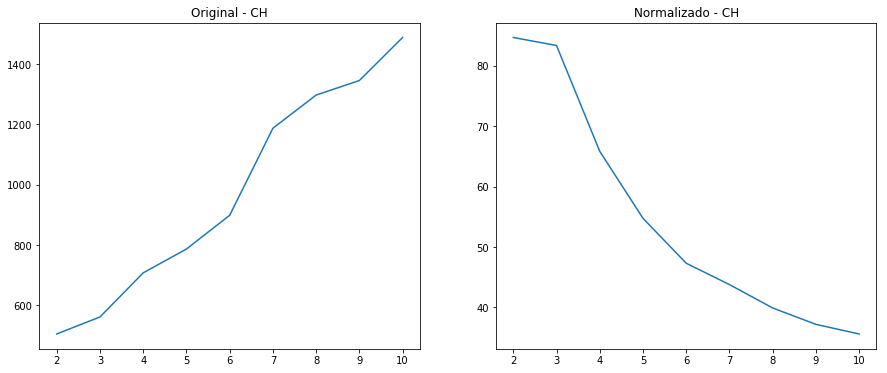

In [0]:
# tecnica de K-Means com normalização com metrica calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

X = pd.DataFrame(datasets.load_wine()['data'])
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

k_range = range(2, 11)
ch = []
ch_norm = []
for k in k_range:
  
  model = KMeans(n_clusters=k)
  model = model.fit(X)
  ch.append(calinski_harabasz_score(X, model.labels_))
  
  model = KMeans(n_clusters=k)
  model = model.fit(X_norm)
  ch_norm.append(calinski_harabasz_score(X_norm, model.labels_))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(k_range, ch)
ax1.set_title('Original - CH')

ax2.plot(k_range, ch_norm)
ax2.set_title('Normalizado - CH');


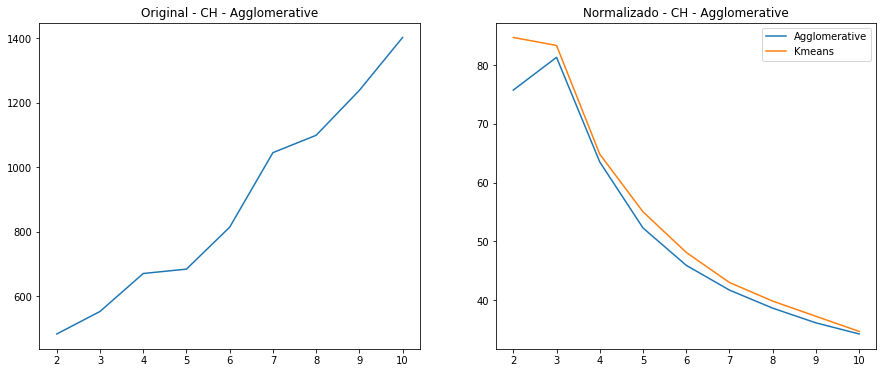

In [0]:
# tecnica de aglutinação com normalização com metrica calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

X = pd.DataFrame(datasets.load_wine()['data'])
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

k_range = range(2, 11)
ch = []
ch_norm = []
ch_norm_kmeans = []
for k in k_range:
  
  model = AgglomerativeClustering(n_clusters=k, linkage='ward')
  model = model.fit(X)
  ch.append(calinski_harabasz_score(X, model.labels_))
  
  model = AgglomerativeClustering(n_clusters=k, linkage='ward')
  model = model.fit(X_norm)
  ch_norm.append(calinski_harabasz_score(X_norm, model.labels_))
  
  model = KMeans(n_clusters=k)
  model = model.fit(X_norm)
  ch_norm_kmeans.append(calinski_harabasz_score(X_norm, model.labels_))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(k_range, ch)
ax1.set_title('Original - CH - Agglomerative')

ax2.plot(k_range, ch_norm, label='Agglomerative')
ax2.plot(k_range, ch_norm_kmeans, label='Kmeans')
ax2.set_title('Normalizado - CH - Agglomerative')
ax2.legend()

## Segunda Prática

- Selecionar a base de dados wine (datasets.load_wine())
- Normalizar os dados
- Aplicar uma técnica de clusterização
- Utilizar uma métrica para selecionar o número de clusters


- Tentar comparar os resultados utilizando outra técnica de clusterização
- Tentar comparar os resultados utilizando outra métrica 

- Enviar o notebook para os emails phar@poli.br rodrigo.paula@ufpe.br